In [26]:
#this is heavily clean version, was so ugly earlier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [27]:
from google.colab import files
uploded= files.upload()


Saving TSLA.csv to TSLA (1).csv


In [28]:
df=pd.read_csv('TSLA.csv')
df=df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500
...,...,...,...,...,...,...,...
2021-05-25,2021-05-25,607.309998,613.989990,595.710022,604.690002,604.690002,28005900
2021-05-26,2021-05-26,607.559998,626.169983,601.500000,619.130005,619.130005,28639300
2021-05-27,2021-05-27,620.239990,631.130005,616.210022,630.849976,630.849976,26370600
2021-05-28,2021-05-28,628.500000,635.590027,622.380005,625.219971,625.219971,22691200


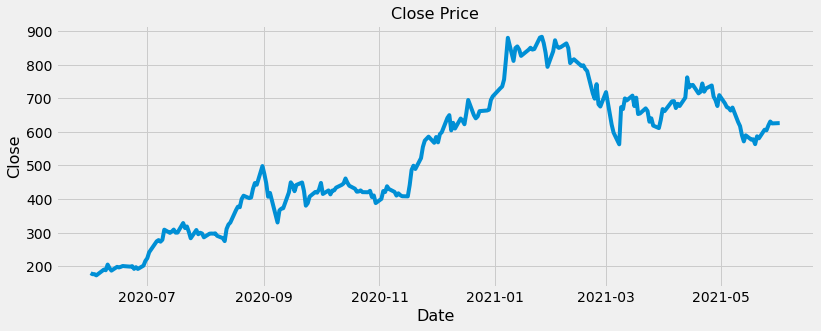

In [29]:
plt.figure(figsize=(12.1,4.5))
plt.title('Close Price', fontsize=16)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.show()

In [30]:
#calc the three movinf averages
short= df.Close.ewm(span=5, adjust=False).mean()
mid= df.Close.ewm(span=22, adjust=False).mean()
lon=df.Close.ewm(span=64, adjust=False).mean()

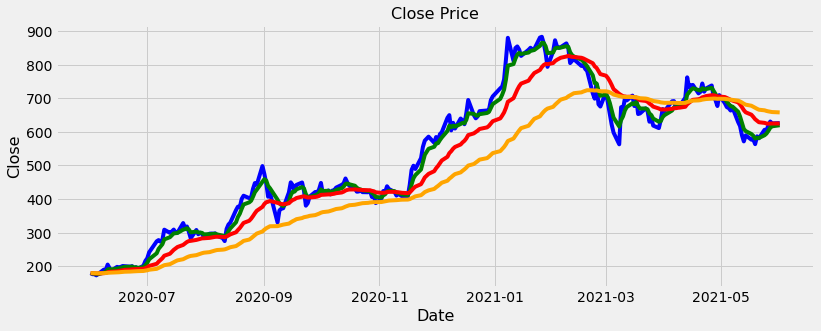

In [31]:
#visuvalize the MAs
plt.figure(figsize=(12.1,4.5))
plt.title('Close Price', fontsize=16)
plt.plot(df['Close'], label='CLose Price', color='blue')
plt.plot(short,label='short', color='green')
plt.plot(mid,label='mid', color='red')
plt.plot(lon,label='long', color='orange')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.show()

In [32]:
df['Short']=short
df['Mid']=mid
df['Long']=lon
df

,Date,Open,High,Low,Close,Adj Close,Volume,Short,Mid,Long
2020-06-01,2020-06-01,171.600006,179.800003,170.820007,179.619995,179.619995,74697500,179.619995,179.619995,179.619995
2020-06-02,2020-06-02,178.940002,181.731995,174.199997,176.311996,176.311996,67828000,178.517329,179.332343,179.518210
2020-06-03,2020-06-03,177.623993,179.587997,176.020004,176.591995,176.591995,39747500,177.875551,179.094052,179.428173
2020-06-04,2020-06-04,177.975998,179.149994,171.688004,172.876007,172.876007,44438500,176.209036,178.553352,179.226568
2020-06-05,2020-06-05,175.567993,177.304001,173.240005,177.132004,177.132004,39059500,176.516692,178.429757,179.162120
...,...,...,...,...,...,...,...,...,...,...
2021-05-25,2021-05-25,607.309998,613.989990,595.710022,604.690002,604.690002,28005900,594.936331,624.878117,662.364903
2021-05-26,2021-05-26,607.559998,626.169983,601.500000,619.130005,619.130005,28639300,603.000889,624.378281,661.034599
2021-05-27,2021-05-27,620.239990,631.130005,616.210022,630.849976,630.849976,26370600,612.283918,624.941037,660.105841
2021-05-28,2021-05-28,628.500000,635.590027,622.380005,625.219971,625.219971,22691200,616.595936,624.965292,659.032430


In [15]:
#fn to buy and sell the thingg
def buy_sell_function(data):
  buy_list=[]
  sell_list=[]
  flag_long=False
  flag_short=False
  for i in range(0, len(data)):
    if data['Mid'][i] < data['Long'][i] and data['Short'][i]<data['Mid'][i] and flag_long==False and flag_short==False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short==True and data['Short'][i]>data['Mid'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Mid'][i] > data['Long'][i] and data['Short'][i] > data['Mid'][i] and flag_long==False and flag_short==False:
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long==True and data['Short'][i] < data['Mid'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False   
    else:
      sell_list.append(np.nan)
      buy_list.append(np.nan)  
      
  return (buy_list,sell_list)    

In [33]:
df['Buy']=buy_sell_function(df)[0]
df['Sell']=buy_sell_function(df)[1]


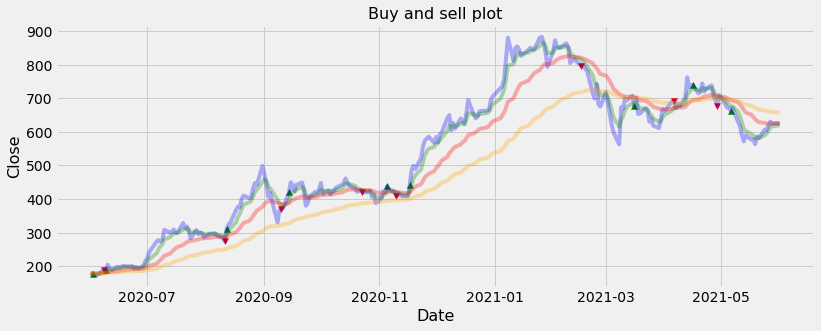

In [34]:
#add the buy and sell signals
plt.figure(figsize=(12.1,4.5))
plt.title('Buy and sell plot', fontsize=16)
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.3)
plt.plot(short,label='short', color='green', alpha=0.3)
plt.plot(mid,label='mid', color='red', alpha=0.3)
plt.plot(lon,label='long', color='orange', alpha=0.3)
plt.scatter(df.index,df['Buy'],color='green',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',marker='v',alpha=1)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close', fontsize=16)
plt.show()